# Diabetes Prediction - ML-Model

#### Load preprocessed data, Build, Select, Train and Evaluate Models

In [1]:
from models_config import *
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

print("Libraries Imported ..")

2021-11-25 19:25:52.652006: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-25 19:25:52.652046: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Libraries Imported ..


## 1. Load Preprocessed Dataset

In [2]:
DATA_PATH =  "../data/prepared_data.json"
mfcc, labels = load_data(DATA_PATH)

In [3]:
print(f" MFCCs Shape : {mfcc.shape} | Labels Length : {len(labels)}")

 MFCCs Shape : (21312, 44, 13) | Labels Length : 21312


## 2. Data Preparation

In [4]:
X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2, DATA_PATH)
pd.DataFrame({"Training": [X_train.shape, y_train.shape], 
              "Validation":[X_validation.shape, y_validation.shape], 
              "Testing":[X_test.shape, y_test.shape]}, index=['Features', 'Target'])

,Training,Validation,Testing
Features,"(12787, 44, 13, 1)","(3197, 44, 13, 1)","(5328, 44, 13, 1)"
Target,"(12787,)","(3197,)","(5328,)"


## 3. Build Model

In [6]:
input_shape = (X_train.shape[1], X_train.shape[2])
model = build_rnn_model(input_shape)

## 4. Compule Model

In [7]:
lr, loss, metrics = 0.0001, 'sparse_categorical_crossentropy', 'accuracy'
model = compule_model(lr, loss, metrics, model)

## 5.  Model Summary

In [8]:
 model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 44, 64)            19968     
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 57,802
Trainable params: 57,802
Non-trainable params: 0
_________________________________________________________________


## 6. Train Model

In [9]:
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

Epoch 1/30
400/400 [==============================] - 34s 74ms/step - loss: 2.2667 - accuracy: 0.1441 - val_loss: 2.1618 - val_accuracy: 0.2287
Epoch 2/30
400/400 [==============================] - 26s 66ms/step - loss: 2.0049 - accuracy: 0.2740 - val_loss: 1.7479 - val_accuracy: 0.3647
Epoch 3/30
400/400 [==============================] - 27s 68ms/step - loss: 1.6457 - accuracy: 0.4013 - val_loss: 1.3952 - val_accuracy: 0.5186
Epoch 4/30
400/400 [==============================] - 27s 67ms/step - loss: 1.3588 - accuracy: 0.5110 - val_loss: 1.1626 - val_accuracy: 0.6021
Epoch 5/30
400/400 [==============================] - 27s 68ms/step - loss: 1.1792 - accuracy: 0.5686 - val_loss: 1.0454 - val_accuracy: 0.6362
Epoch 6/30
400/400 [==============================] - 27s 68ms/step - loss: 1.0625 - accuracy: 0.6156 - val_loss: 0.9753 - val_accuracy: 0.6634
Epoch 7/30
400/400 [==============================] - 27s 66ms/step - loss: 0.9695 - accuracy: 0.6613 - val_loss: 0.8986 - val_accuracy:

## 7. Plot Model Training History

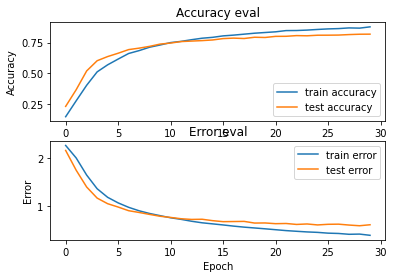

<Figure size 1152x576 with 0 Axes>

In [10]:
plot_history(history)

## 8.  Evaluate Model on test set

In [11]:
model_loss_acc(model, X_train, y_train, X_test, y_test, X_validation, y_validation)

NameError: name 'model_loss_acc' is not defined

## 9. Prediction

In [12]:
# pick a sample to predict from the test set
X_to_predict = X_test[100]
y_to_predict = y_test[100]

# predict sample
predict(model, X_to_predict, y_to_predict)

Target: 2, Predicted label: [2]


#####################################################################################################

#####################################################################################################

#####################################################################################################